Missing values per column:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


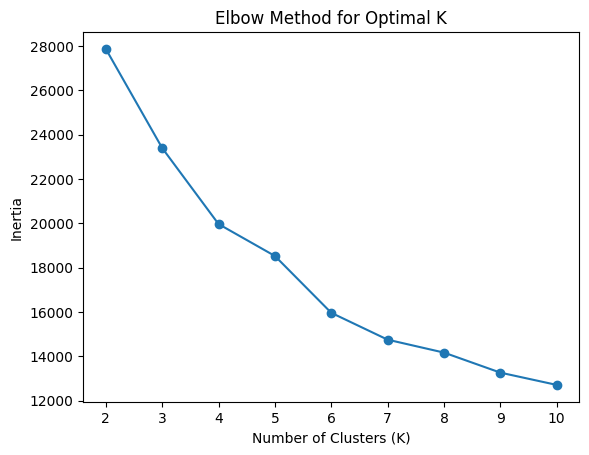

Silhouette Score for K-Means: 0.24232976964087152


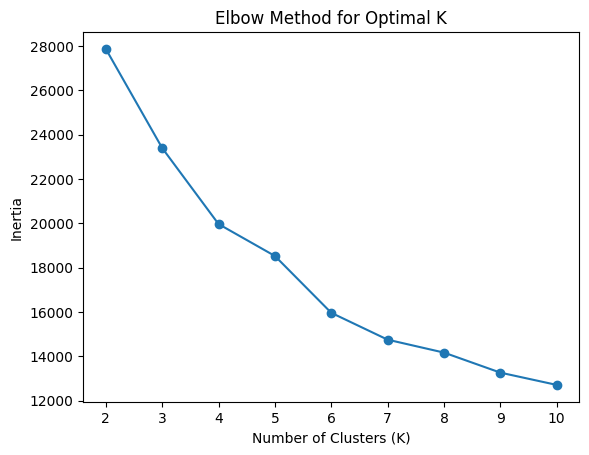

Silhouette Score for K-Means: 0.24232976964087152


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "/content/EastWestAirlines(data).csv"
df = pd.read_csv(data_path)

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Impute missing values with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Detect and remove outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df_imputed))

# Filter data based on z-scores
df_clean = df_imputed[(z_scores < 3).all(axis=1)]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Scale the data using StandardScaler before applying KMeans
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Perform K-Means clustering with optimal K
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

# Evaluate with silhouette score
silhouette_kmeans = silhouette_score(df_scaled, clusters_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df_scaled = scaler.fit_transform(df_clean)
# Determine optimal number of clusters using the Elbow Method
inertia = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Perform K-Means clustering with optimal K
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

# Evaluate with silhouette score
silhouette_kmeans = silhouette_score(df_scaled, clusters_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

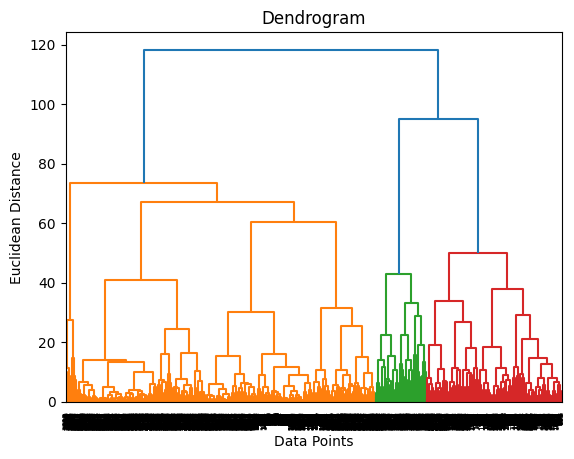

Silhouette Score for Hierarchical Clustering: 0.27961095816015374


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
clusters_hierarchical = agglo.fit_predict(df_scaled)

# Evaluate with silhouette score
silhouette_hierarchical = silhouette_score(df_scaled, clusters_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")


In [ ]:
from sklearn.cluster import DBSCAN

# Experiment with different values of epsilon and min_samples
eps_values = [0.5, 1.0, 1.5]
min_samples = [5, 10, 15]

for eps in eps_values:
    for min_s in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        clusters_dbscan = dbscan.fit_predict(df_scaled)
        if len(set(clusters_dbscan)) > 1:
            silhouette_dbscan = silhouette_score(df_scaled, clusters_dbscan)
            print(f"DBSCAN (eps={eps}, min_samples={min_s}): Silhouette Score = {silhouette_dbscan}")


DBSCAN (eps=0.5, min_samples=5): Silhouette Score = -0.3994552312980999
DBSCAN (eps=0.5, min_samples=10): Silhouette Score = -0.2450984002013958
DBSCAN (eps=0.5, min_samples=15): Silhouette Score = -0.09569122934308208
DBSCAN (eps=1.0, min_samples=5): Silhouette Score = 0.028266745477114507
DBSCAN (eps=1.0, min_samples=10): Silhouette Score = 0.06336096102439692
DBSCAN (eps=1.0, min_samples=15): Silhouette Score = 0.10853311649456916
DBSCAN (eps=1.5, min_samples=5): Silhouette Score = 0.18885114313037532
DBSCAN (eps=1.5, min_samples=10): Silhouette Score = 0.2087401228564088
DBSCAN (eps=1.5, min_samples=15): Silhouette Score = 0.2059354763299031


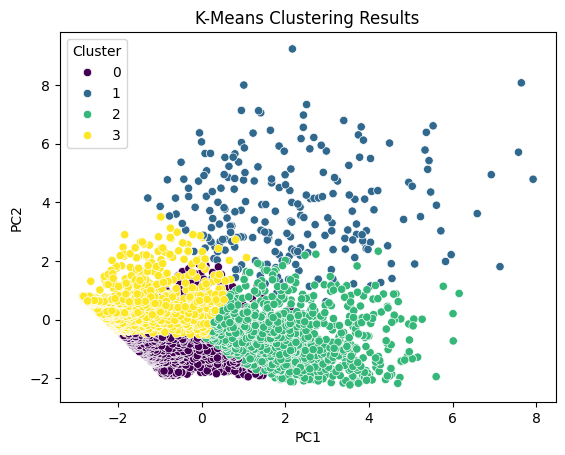

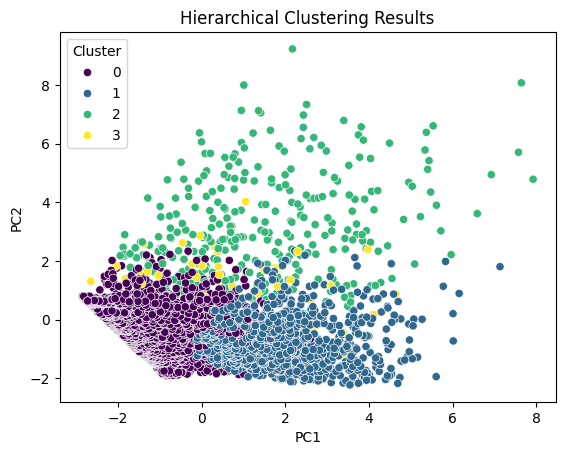

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


# Plot clusters for K-Means
df_pca['Cluster'] = clusters_kmeans
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title("K-Means Clustering Results")
plt.show()

# Plot clusters for Hierarchical Clustering
df_pca['Cluster'] = clusters_hierarchical
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title("Hierarchical Clustering Results")
plt.show()
